In [1]:
# install darts library
!pip install darts
!pip install urllib3

/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com


You should consider upgrading via the '/home/ubuntu/anaconda3/envs/pytorch_p37/bin/python -m pip install --upgrade pip' command.
/bin/bash: switchml: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `switchml'
/bin/bash: _moduleraw: line 1: syntax error: unexpected end of file
/bin/bash: error importing function definition for `_moduleraw'
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com
You should consider upgrading via the '/home/ubuntu/anaconda3/envs/pytorch_p37/bin/python -m pip install --upgrade pip' command.


In [2]:
# Load libraries
import numpy as np
from numpy import array
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import gzip
import requests
from darts.utils.missing_values import fill_missing_values
from darts.models import (
    RNNModel,
    TCNModel,
    TransformerModel,
    NBEATSModel,
    BlockRNNModel,
)
from darts import TimeSeries
pd.set_option("display.max_columns", None)

In [3]:
url = "https://nft-capstone.s3.us-west-1.amazonaws.com/df_all_values.pkl.gz"
df_all_values = pd.read_pickle(url)
df_all_values['Datetime_updated'] = pd.to_datetime(df_all_values['Datetime_updated'])
df_all_values['Datetime_updated_seconds'] = pd.to_datetime(df_all_values['Datetime_updated_seconds'])

In [4]:
df_all_values

,Smart_contract,ID_token,Transaction_hash,Seller_address,Seller_username,Buyer_address,Buyer_username,Image_url_1,Image_url_2,Image_url_3,Image_url_4,Price_Crypto,Crypto,Price_USD,Name,Description,Collection,Market,Datetime_updated,Datetime_updated_seconds,Permanent_link,Unique_id_collection,Collection_cleaned,Category,Datetime_updated_dt,Datetime_daybeforesale,nft_sales_count,First_item_Collection_cleaned,First_item_Unique_id_collection,Previous_Price_USD,Previous_Datetime_updated_seconds,Elapsed_time,Price_increase,Price_diff,Price_diff_pctg,GoogleTrends,BTC_price,ETH_price,MANA_price,WAX_price,GoogleTrends_7d_rolling_avg,GoogleTrends_14d_rolling_avg,GoogleTrends_30d_rolling_avg,GoogleTrends_60d_rolling_avg,GoogleTrends_90d_rolling_avg,BTC_price_7d_rolling_avg,BTC_price_14d_rolling_avg,BTC_price_30d_rolling_avg,BTC_price_60d_rolling_avg,BTC_price_90d_rolling_avg,ETH_price_7d_rolling_avg,ETH_price_14d_rolling_avg,ETH_price_30d_rolling_avg,ETH_price_60d_rolling_avg,ETH_price_90d_rolling_avg,MANA_price_7d_rolling_avg,MANA_price_14d_rolling_avg,MANA_price_30d_rolling_avg,MANA_price_60d_rolling_avg,MANA_price_90d_rolling_avg,WAX_price_7d_rolling_avg,WAX_price_14d_rolling_avg,WAX_price_30d_rolling_avg,WAX_price_60d_rolling_avg,WAX_price_90d_rolling_avg,Ggl_trends_collection,Ggl_trends_collection_7d_rolling_avg,Ggl_trends_collection_14d_rolling_avg,Ggl_trends_collection_30d_rolling_avg,Ggl_trends_collection_60d_rolling_avg,Ggl_trends_collection_90d_rolling_avg,Datetime_dayaftersale,Price_USD_median_7d,Price_USD_max_7d,Price_USD_median_14d,Price_USD_max_14d,Price_USD_median_30d,Price_USD_max_30d,Price_USD_median_60d,Price_USD_max_60d,Price_USD_median_90d,Price_USD_max_90d,Price_USD_median_180d,Price_USD_max_180d,Price_USD_median_365d,Price_USD_max_365d,Price_USD_median_730d,Price_USD_max_730d,Price_Crypto_median_7d,Price_Crypto_max_7d,Price_Crypto_median_14d,Price_Crypto_max_14d,Price_Crypto_median_30d,Price_Crypto_max_30d,Price_Crypto_median_60d,Price_Crypto_max_60d,Price_Crypto_median_90d,Price_Crypto_max_90d,Price_Crypto_median_180d,Price_Crypto_max_180d,Price_Crypto_median_365d,Price_Crypto_max_365d,Price_Crypto_median_730d,Price_Crypto_max_730d,Price_USD_collection_cum_median,Price_USD_collection_cum_max,Price_Crypto_collection_cum_median,Price_Crypto_collection_cum_max,new_idx,p_resale,pca_1,pca_2,pca_3,pca_4,pca_5,trans_count_seller,deg_centrality_seller,pgrank_seller,trans_count_buyer,deg_centrality_buyer,pgrank_buyer
0,0x8ae8d2ae74a96595bcdab803b563f594009e3db2,59,0xf31852b040f32d14322e1b599cac38eadedb1e145cfc...,0xd5f4bbd4d1f9ecf3bccb12ac8a2c8bdc5b45b482,Crypto_Wizard_89,0xfdc34f61ccc6e5cbf8d168614ab29bae624085c9,KM-ATT,https://lh3.googleusercontent.com/SLoh29AeY88B...,http://www.aicryptoart.org/artpieces/59__Great...,https://lh3.googleusercontent.com/SLoh29AeY88B...,https://lh3.googleusercontent.com/SLoh29AeY88B...,0.00001,ETH,0.001805,59 Great Myersen shouts crazily to the zoo,AI generated artpiece,Aicryptoart,OpenSea,2019-09-09,2019-09-09 20:00:35,https://opensea.io/assets/0x8ae8d2ae74a96595bc...,"('Aicryptoart', '59')",Ai,Art,2019-09-09,2019-09-08,1,1,1,8.260200,2020-07-01 19:01:45,NaT,0,NaN,NaN,0,10402.8,181.44,0.0319,0.0410,0.000000,0.0,0.0,0.000000,0.000000,10467.057143,10139.678571,10361.976667,10481.255000,10510.374444,176.267143,175.700000,186.076000,204.624333,233.033222,0.032300,0.032514,0.034870,0.038450,0.043492,0.041100,0.042964,0.049710,0.053525,0.065018,NaN,NaN,NaN,NaN,NaN,NaN,2019-09-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,0.500000,24.602621,22.079378,13.450125,17.543880,-0.882289,1,0.000021,0.000001,1,0.000600,8.770244e-06
1,0x8ae8d2ae74a96595bcdab803b563f594009e3db2,39,0x59c45346fed5b753e0ce1d51dd9d56e1df5a27dd620d...,0xd5f4bbd4d1f9ecf3bccb12ac8a2c8bdc5b45b482,Crypto_Wizard_89,0x73aab1333dc134e34f5c7b492f90e76cd7589476,rabanheidr,https://lh3.googleusercontent.com/JqKxBV1odtH7...,http://www.aicryp

In [5]:
df_all_values.columns.values.tolist()

['Smart_contract',
 'ID_token',
 'Transaction_hash',
 'Seller_address',
 'Seller_username',
 'Buyer_address',
 'Buyer_username',
 'Image_url_1',
 'Image_url_2',
 'Image_url_3',
 'Image_url_4',
 'Price_Crypto',
 'Crypto',
 'Price_USD',
 'Name',
 'Description',
 'Collection',
 'Market',
 'Datetime_updated',
 'Datetime_updated_seconds',
 'Permanent_link',
 'Unique_id_collection',
 'Collection_cleaned',
 'Category',
 'Datetime_updated_dt',
 'Datetime_daybeforesale',
 'nft_sales_count',
 'First_item_Collection_cleaned',
 'First_item_Unique_id_collection',
 'Previous_Price_USD',
 'Previous_Datetime_updated_seconds',
 'Elapsed_time',
 'Price_increase',
 'Price_diff',
 'Price_diff_pctg',
 'GoogleTrends',
 'BTC_price',
 'ETH_price',
 'MANA_price',
 'WAX_price',
 'GoogleTrends_7d_rolling_avg',
 'GoogleTrends_14d_rolling_avg',
 'GoogleTrends_30d_rolling_avg',
 'GoogleTrends_60d_rolling_avg',
 'GoogleTrends_90d_rolling_avg',
 'BTC_price_7d_rolling_avg',
 'BTC_price_14d_rolling_avg',
 'BTC_price_30

In [6]:
all_values_collection_grouped = df_all_values.groupby('Collection_cleaned')
df_all_collections = []
for x in all_values_collection_grouped.groups:
    df = all_values_collection_grouped.get_group(x)
    df = df[['Datetime_updated','Price_USD']]
    df['Datetime_updated'] = pd.to_datetime(df['Datetime_updated'])
    df = df.groupby(pd.Grouper(key='Datetime_updated', axis=0)).mean()
    df = df.reset_index()
    df_all_collections.append(df)

df_all_collections[0]

,Datetime_updated,Price_USD
0,2021-01-27,38.732400
1,2021-02-16,53.288400
2,2021-02-26,88.909200
3,2021-03-05,59.856600
4,2021-03-06,47.775900
5,2021-03-07,100.983300
6,2021-03-10,36.367000
7,2021-03-17,53.717400
8,2021-03-20,91.748250
9,2021-03-21,127.161297


In [7]:
df_all_collections[0]

,Datetime_updated,Price_USD
0,2021-01-27,38.732400
1,2021-02-16,53.288400
2,2021-02-26,88.909200
3,2021-03-05,59.856600
4,2021-03-06,47.775900
5,2021-03-07,100.983300
6,2021-03-10,36.367000
7,2021-03-17,53.717400
8,2021-03-20,91.748250
9,2021-03-21,127.161297


In [8]:
ts_all_collections = []
for df in df_all_collections:
    price_usd_series = TimeSeries.from_dataframe(df, 'Datetime_updated', 'Price_USD', fill_missing_dates=True, freq='D')
    price_usd_series = fill_missing_values(price_usd_series)
    ts_all_collections.append(price_usd_series)

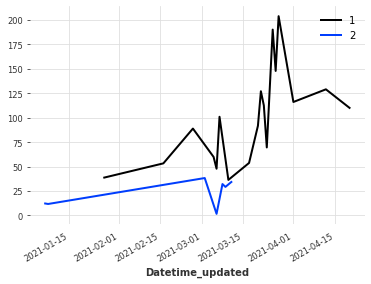

In [9]:
ts_all_collections[0].plot(label="1")
ts_all_collections[1].plot(label="2")
plt.legend()

In [10]:
len_1 = int(len(ts_all_collections[0])*.7)
len_1_diff = len(ts_all_collections[0]) - len_1
len_2 = int(len(ts_all_collections[1])*.7)
train_1, val_1 = ts_all_collections[0][:len_1], ts_all_collections[0][len_1:]
train_2, val_2 = ts_all_collections[1][:len_2], ts_all_collections[1][len_2:]

In [11]:
model = NBEATSModel(
    input_chunk_length=24, output_chunk_length=12, n_epochs=100, random_state=0
)
model.fit([train_1, train_2], verbose=True)

[2022-03-29 23:35:23,868] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 46 samples.
[2022-03-29 23:35:23,868] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 46 samples.
[2022-03-29 23:35:23,928] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-29 23:35:23,928] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2022-03-29 23:35:23,929] WARNING | darts.models.forecasting.torch_forecasting_model | DeprecationWarning: kwarg `verbose` is deprecated and will be removed in a future Darts version. Instead, control verbosity with PyTorch Lightning Trainer parameters `enable_progress_bar`, `progress_bar_refresh_rate` and `enable_model_summary` in the `pl_trainer_kwargs` dict at model creation.
[2022-03-29 23:35:23,929] WARNING | darts.models.forecasting.torch_forecasting_model | Deprecati

Training: 0it [00:00, ?it/s]

In [12]:
pred = model.predict(n=1, series=train_1)

'''
ts_all_collections[0].plot(label="actual")
pred.plot(label="forecast")
plt.legend()
print("MAPE = {:.2f}%".format(mape(ts_all_collections[0], pred)))
'''

Predicting: 2it [00:00, ?it/s]

AttributeError: 'Tensor' object has no attribute 'tile'

In [ ]:
sum_all_values = df_all_values.groupby(['Collection_cleaned', pd.Grouper(key='Datetime_updated', axis=0)]).mean()
#sum_all_values['Datetime_updated'] = pd.to_datetime(sum_all_values['Datetime_updated'])
#all_df = [sum_all_values.get_group(x) for x in sum_all_values.groups]
all_df[0]

In [ ]:
price_usd_series = TimeSeries.from_dataframe(sum_all_values, 'Datetime_updated', 'Price_USD', fill_missing_dates=True, freq=None)